# 책 검색 

## 문제 1번

In [130]:
import os
import sys
import urllib.request

client_id = "oiDMevcwhNwZKrFIdLAn"
client_secret = "wG9I4BDaer"

URL 구하기 (파라미터 : 'book', '검색어', '시작 숫자', '끝 숫자')

In [131]:
def gen_search_url(api_node, search_text, start_num, disp_num, dafr, dato):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + "_adv.json"
    param_start = "?start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    param_titl = "&d_titl=" + urllib.parse.quote(search_text)
    param_st_date = '&d_dafr' + str(dafr)
    param_en_date = '&d_dato' + str(dato)

    return base + node + param_start + param_disp + param_titl + '&d_catg=280' + param_st_date + param_en_date

URL 페이지 가져오기 (파라미터 : URL)

In [132]:
import json 
import datetime 

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [134]:
url = gen_search_url("book", "C", 1, 5, 20220101, 20220420)
one_result = get_result_onpage(url)

[2022-04-26 14:42:17.905471] Url Request Success


In [135]:
one_result

{'lastBuildDate': 'Tue, 26 Apr 2022 14:42:18 +0900',
 'total': 2575,
 'start': 1,
 'display': 5,
 'items': [{'title': '혼자 공부하는 <b>C</b> 언어',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=15028694',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/150/286/15028694.jpg?type=m1&udate=20211206',
   'author': '서현우',
   'price': '24000',
   'discount': '21600',
   'publisher': '한빛미디어',
   'pubdate': '20190610',
   'isbn': '1162241861 9791162241868',
   'description': '1:1 과외하듯 배우는 <b>C</b> 프로그래밍 자습서\n\n혼자 해도 충분하다! 1:1 과외하듯 배우는 <b>C</b> 프로그래밍 자습서\n이 책은 독학으로 <b>C</b> 언어를 배우는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’ ‘어떻게’ 학습해야 할지조차 모르는 입문자의 막연한 마음을 살펴, 과외 선생님이... '},
  {'title': '시나공 정보처리기사 실기 (<b>C</b>와 JAVA의 기,산업기사 포함,2019)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=14466324',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/144/663/14466324.jpg?type=m1&udate=20210818',
   'author': '한기준|김기윤|김정준|강윤석|길벗알앤디',
   'price': '31000',
   'discount': '

태그 지우기 (파라미터 : 아마 제목이 될 것)

In [136]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str 

필드 구하기 (파라미터 : JSON 데이터(get_result_onpage))

In [137]:
import pandas as pd 

def get_fields(json_data, lang):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    language = lang
    author = [each["author"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    publisher = [each["publisher"] for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        'language': language,
        "title": title, 
        "author": author, 
        "price": price,
        'publisher': publisher,
        'pubdate': pubdate,
        'isbn': isbn
    }, columns=['language', "title",'isbn', "author", "price",'publisher','pubdate'])
    return result_pd

페이지 수 고려해서 데이터 가져오기

In [208]:
import time
book_list = ['python','파이썬','c++','c#','c','javascript','자바스크립트','java','자바','visual basic','비주얼 베이직','sql','php','r']
book_list_extended = ['assembly','어셈블리','go','matlab','매트랩','groovy','ruby','swift','fortran','perl','delphi']
result_books = [] 
for abook in book_list:
    for date in range(19800101, 20230101, 40000):
        for n in range(1, 1000, 100):
            if date == 20210101:
                url = gen_search_url("book", abook, n, 100, date, 20220420)
            url = gen_search_url("book", abook, n, 100, date, date+40000)
            json_result = get_result_onpage(url)
            time.sleep(0.5)
            if not json_result["items"]:
                break
            pd_result = get_fields(json_result, abook)
            result_books.append(pd_result)
result_books = pd.concat(result_books)
    


[2022-04-26 16:08:22.766652] Url Request Success
[2022-04-26 16:08:23.621017] Url Request Success
[2022-04-26 16:08:24.243542] Url Request Success
[2022-04-26 16:08:24.847529] Url Request Success
[2022-04-26 16:08:25.749137] Url Request Success
[2022-04-26 16:08:26.495472] Url Request Success
[2022-04-26 16:08:27.123946] Url Request Success
[2022-04-26 16:08:27.727359] Url Request Success
[2022-04-26 16:08:28.566669] Url Request Success
[2022-04-26 16:08:29.410589] Url Request Success
[2022-04-26 16:08:30.007952] Url Request Success
[2022-04-26 16:08:30.596608] Url Request Success
[2022-04-26 16:08:31.182085] Url Request Success
[2022-04-26 16:08:31.776913] Url Request Success
[2022-04-26 16:08:32.408794] Url Request Success
[2022-04-26 16:08:32.990230] Url Request Success
[2022-04-26 16:08:33.585559] Url Request Success
[2022-04-26 16:08:34.186672] Url Request Success
[2022-04-26 16:08:34.765194] Url Request Success
[2022-04-26 16:08:35.343743] Url Request Success
[2022-04-26 16:08:35

In [210]:
result_books.tail()

,language,title,isbn,author,price,publisher,pubdate
1,r,AutoCAD 매뉴얼 (Release 2.6 -R 10 사용자를 위한),667600027X 2006676000274,김영섭,18000,크라운출판사,19900901
2,r,기업경영을 위한 LOTUS 1-2-3 R.2,2602002380 2002602002381,김궁헌,12000,법문사,19880501
3,r,LOTUS 1-2-3 R 2.2,8918126115 9788918126111,김궁현,12000,법문사,19880501
4,r,3D 스튜디오 R3,8985553836 9788985553834,안대식,20000,연암출판사,19940801
5,r,3D 스튜디오 R4,8931542445 9788931542448,이용재,23000,성안당,19950601


In [211]:
result_books.shape

(79387, 7)

In [212]:
result_books_copy = result_books.copy()

In [364]:
result_books_copy.shape

(79387, 7)

정확하게 1980년 1월 1일부터 2022년 4월 20일까지의 데이터를 가져왔습니다.

# 문제 2번

In [366]:
len(result_books['isbn'].unique())

5985

In [367]:
result_books['language'].value_counts()

c++             11000
c               11000
자바               9691
java             8503
파이썬              8426
sql              5181
r                4466
visual basic     3883
비주얼 베이직          3707
자바스크립트           3421
c#               3388
python           2277
php              2255
javascript       2189
Name: language, dtype: int64

In [368]:
result_books.drop_duplicates(subset=['isbn'],keep='first',inplace=True)

In [369]:
result_books['language'].value_counts()

c++             983
파이썬             728
c               627
java            544
자바              488
sql             446
r               385
visual basic    337
비주얼 베이직         314
c#              301
자바스크립트          280
python          207
javascript      187
php             158
Name: language, dtype: int64

In [370]:
result_books.shape

(5985, 7)

## 문제 3번

한글화 : 일단 시각화 하기 전

In [371]:
import matplotlib.pyplot as plt
import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
get_ipython().run_line_magic('matplotlib', 'inline')

In [372]:
book_list

['python',
 '파이썬',
 'c++',
 'c#',
 'c',
 'javascript',
 '자바스크립트',
 'java',
 '자바',
 'visual basic',
 '비주얼 베이직',
 'sql',
 'php',
 'r']

In [373]:
result_books['language'] = result_books['language'].replace('파이썬', 'python')
result_books['language'] = result_books['language'].replace('자바스크립트', 'javascript')
result_books['language'] = result_books['language'].replace('자바', 'java')
result_books['language'] = result_books['language'].replace('비주얼 베이직', 'visual basic')

In [374]:
result_books['language'].value_counts()

java            1032
c++              983
python           935
visual basic     651
c                627
javascript       467
sql              446
r                385
c#               301
php              158
Name: language, dtype: int64

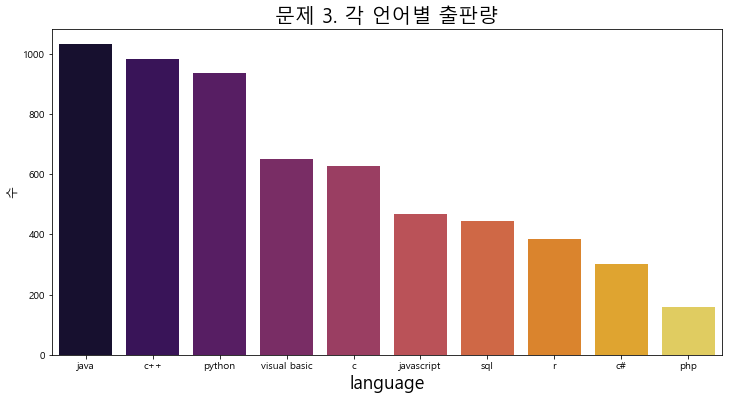

In [375]:
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.countplot(
    x = 'language',
    data = result_books,
    palette = 'inferno',
    order = result_books['language'].value_counts().index[:10]
)
ax.set_title('문제 3. 각 언어별 출판량', fontsize=20)
ax.set_xlabel('language', fontsize=18)
ax.set_ylabel('수', fontsize=12)
plt.show()

## 문제 4

In [376]:
result_books['publisher'].unique()

array(['길벗', '청람', '정보문화사', '가메', '생능출판', '영진닷컴', '인피니티북스', '경문사', '성안당',
       '학산미디어', '아이리포', '한양대학교출판부', '렉스미디어닷넷', '서현사', '연두에디션',
       '서울시립대학교출판부', '성균관대학교출판부', '인사이트', 'STORYJOA(스토리조아)', '자유아카데미',
       '북스홀릭퍼블리싱', '범', '북넷', '보국출판사', '이한미디어', '홍릉(홍릉과학출판사)', '에이콘출판',
       '한나래아카데미', '아티오', '상학당', '교학사', '부크크(Bookk)', '스포트라잇북', '언제나휴일',
       'Packt(GCOScience)', '앤아이컴즈', '노드미디어', '유페이퍼', '사도출판', '퍼플',
       '잇플ITPLE', '아이콕스', '구민사', '카오스북', 'BOOKK(부크크)', '교보문고', '한티미디어',
       '불잉걸', '글로벌', '부크크(bookk)', '한빛미디어', '오미글로벌', '휴먼싸이언스', '비엘북스',
       '홍릉과학출판사', '느린생각', '정보게이트', '인포북', 'PEARSONEDUCATIONKOREA',
       '숭실대학교출판부', '삼각형', '프리렉', '앤써북', '이지스퍼블리싱', '한빛아카데미', '책만', '위키북스',
       '로드북', '파이스탁', '제이펍', '비제이퍼블릭', '생능북스', '인포앤북', '지오북스', '터닝포인트',
       '오렌지미디어', '복두출판사', '책밥', 'icox(아이콕스)', '영남대학교출판부', '일진사', '루비페이퍼',
       '삼양미디어', '디지털북스', '명진씨앤피', '씨마스21', '잇플', '삼일인포마인', '북랩', 'DK로드북스',
       '그린', '서울대학교출판문화원', '홍릉', '심통', '햄큐', '성진미디어', '디스커버리미디어',
       '

In [377]:
len(result_books['publisher'].unique())

561

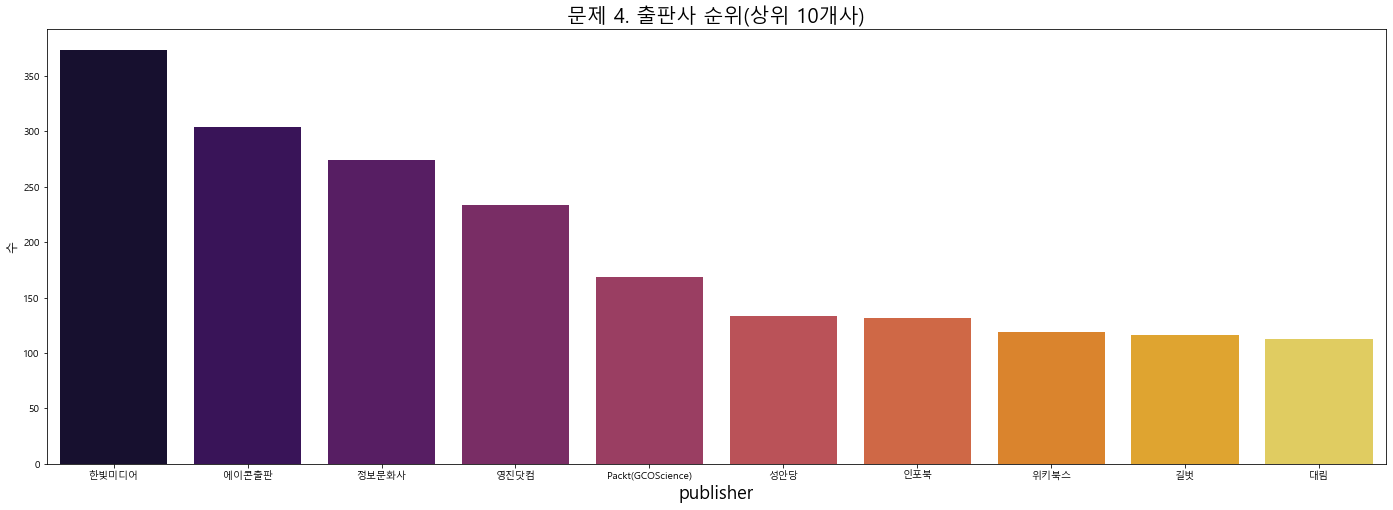

In [378]:

plt.figure(figsize=(24,8))
ax = sns.countplot(
    x = 'publisher',
    data = result_books,
    palette = 'inferno',
    order = result_books['publisher'].value_counts().index[:10]
)
ax.set_title('문제 4. 출판사 순위(상위 10개사)', fontsize=20)
ax.set_xlabel('publisher', fontsize=18)
ax.set_ylabel('수', fontsize=12)
plt.show()

순위정보 만들기

In [379]:
rank_profile = []
for idx, value in enumerate(result_books['publisher'].value_counts()):
    ask = result_books['publisher'].value_counts().index[idx]
    rank_profile.append([idx+1, ask, value])
rank_profile = pd.DataFrame(rank_profile,columns=['rank', 'publisher', 'books_published'])
rank_profile.head()


,rank,publisher,books_published
0,1,한빛미디어,374
1,2,에이콘출판,304
2,3,정보문화사,274
3,4,영진닷컴,234
4,5,Packt(GCOScience),169


## 문제 5

In [380]:
result_books.head()

,language,title,isbn,author,price,publisher,pubdate
0,python,"파이썬 코딩의 기술 (Effective Python 2nd,똑똑하게 코딩하는 법)",1165213192 9791165213190,브렛 슬라킨,32000,길벗,20201030
1,python,"SPSS, R, Python을 활용한 Kaggle 데이터 전략 실무 연습 (SPSS...",8959728756 9788959728756,김광용|정성원|이성택|이재모|임은택,28000,청람,20220415
2,python,파이썬 딥러닝 파이토치 (Python Deep Learning PyTorch),8956748578 9788956748573,이경택|방성수|안상준,25000,정보문화사,20201008
3,python,OpenCV.Python 머신러닝 딥러닝 프로그래밍,8980783116 9788980783113,김동근,26000,가메,20220331
4,python,영상 처리 및 응용 (OpenCV-Python으로 배우는),8970504419 9788970504414,정성환,35000,생능출판,20201124


In [381]:
result_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985 entries, 0 to 5
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   language   5985 non-null   object
 1   title      5985 non-null   object
 2   isbn       5985 non-null   object
 3   author     5985 non-null   object
 4   price      5985 non-null   object
 5   publisher  5985 non-null   object
 6   pubdate    5985 non-null   object
dtypes: object(7)
memory usage: 374.1+ KB


연도별로 정리해야 하니까 pubdate에서 연도 데이터만 가져오기

In [382]:
c = []
a=pd.Series(result_books['pubdate'])
for item in a:
    print(item)
    c.append(int(item[:4]))

20201030
20220415
20201008
20220331
20201124
20210115
20210225
20210225
20200825
20170227
20211215
20200302
20211117
20210915
20210715
20210220
20211223
20220210
20210322
20211130
20220301
20200313
20181218
20190424
20190822
20201230
20210925
20210525
20180623
20200323
20210525
20211130
20190520
20140205
20200210
20201218
20220430
20201015
20200630
20140626
20170130
20200915
20161020
20180220
20190330
20210607
20190425
20140626
20210501
20210430
20190815
20210326
20200228
20210317
20200815
20210319
20200722
20150430
20200228
20210104
20201218
20180907
20201127
20201112
20201030
20201030
20201030
20190830
20200928
20200925
20200930
20200731
20200731
20200731
20200724
20150918
20200706
20200108
20190927
20190823
20200529
20200515
20180920
20120607
20190425
20180710
20190709
20200506
20140212
20140321
20200410
20171012
20170117
20180828
20200220
20190218
20200210
20180630
20151119
20200131
20200130
20200131
20180903
20191224
20190710
20191212
20191212
20191122
20190711
20160520
20191122
2

In [383]:
result_books['pubyear'] = c

In [384]:
result_books.head()

,language,title,isbn,author,price,publisher,pubdate,pubyear
0,python,"파이썬 코딩의 기술 (Effective Python 2nd,똑똑하게 코딩하는 법)",1165213192 9791165213190,브렛 슬라킨,32000,길벗,20201030,2020
1,python,"SPSS, R, Python을 활용한 Kaggle 데이터 전략 실무 연습 (SPSS...",8959728756 9788959728756,김광용|정성원|이성택|이재모|임은택,28000,청람,20220415,2022
2,python,파이썬 딥러닝 파이토치 (Python Deep Learning PyTorch),8956748578 9788956748573,이경택|방성수|안상준,25000,정보문화사,20201008,2020
3,python,OpenCV.Python 머신러닝 딥러닝 프로그래밍,8980783116 9788980783113,김동근,26000,가메,20220331,2022
4,python,영상 처리 및 응용 (OpenCV-Python으로 배우는),8970504419 9788970504414,정성환,35000,생능출판,20201124,2020


In [385]:
result_books = result_books.astype({'pubyear':'int'})
result_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985 entries, 0 to 5
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   language   5985 non-null   object
 1   title      5985 non-null   object
 2   isbn       5985 non-null   object
 3   author     5985 non-null   object
 4   price      5985 non-null   object
 5   publisher  5985 non-null   object
 6   pubdate    5985 non-null   object
 7   pubyear    5985 non-null   int32 
dtypes: int32(1), object(7)
memory usage: 397.4+ KB


어느 책이 최근 더 많이 나왔을까?

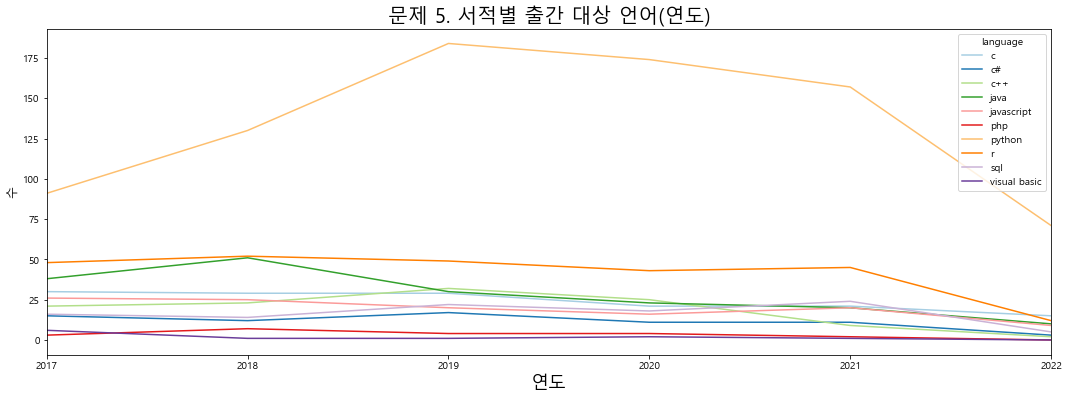

In [386]:
tmp=pd.crosstab(result_books.pubyear,result_books.language).plot(color=sns.color_palette('Paired',10))
tmp.set_title('문제 5. 서적별 출간 대상 언어(연도)', fontsize=20)
tmp.set_xlabel('연도', fontsize=18)
tmp.set_ylabel('수', fontsize=12)
plt.xlim([2017, 2022])
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

19년도까지는 파이썬 서적 출간의 상승세가 이어지고 있었으나 19년도 중반부터 정체되기 시작함

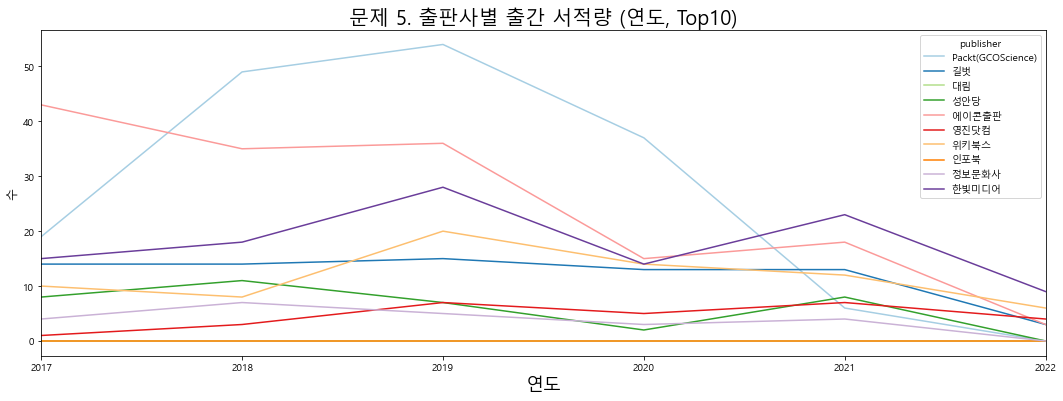

In [387]:
whole=result_books[result_books['publisher'].isin(result_books['publisher'].value_counts()[:10].index)]
tmp=pd.crosstab(whole.pubyear,whole.publisher).plot(color=sns.color_palette('Paired',10))
tmp.set_title('문제 5. 출판사별 출간 서적량 (연도, Top10)', fontsize=20)
tmp.set_xlabel('연도', fontsize=18)
tmp.set_ylabel('수', fontsize=12)
plt.xlim([2017, 2022])
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [388]:
pd.crosstab(whole.publisher,whole.language)

language,c,c#,c++,java,javascript,php,python,r,sql,visual basic
publisher,,,,,,,,,,
Packt(GCOScience),3,18,21,21,11,0,82,11,2,0
길벗,14,7,9,16,16,3,35,6,8,2
대림,4,8,22,32,7,4,0,0,20,16
성안당,24,4,32,24,9,2,12,4,6,16
에이콘출판,13,23,38,43,37,3,102,38,7,0
영진닷컴,19,20,36,48,18,4,13,4,27,45
위키북스,2,9,1,12,23,2,56,2,12,0
인포북,4,10,52,29,3,0,1,0,6,27
정보문화사,15,30,51,56,14,10,13,3,30,52


확실히 확인해보니 Packt 출판사와 에이콘출판 출판사가 파이썬 서적을 많이 내는 것을 확인 가능

즉 그들이 파이썬 서적의 출간량을 줄였다고 볼 수 있다.

In [405]:
result_books = result_books.astype({'price':'int'})
result_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985 entries, 0 to 5
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   language   5985 non-null   object
 1   title      5985 non-null   object
 2   isbn       5985 non-null   object
 3   author     5985 non-null   object
 4   price      5985 non-null   int32 
 5   publisher  5985 non-null   object
 6   pubdate    5985 non-null   object
 7   pubyear    5985 non-null   int32 
dtypes: int32(2), object(6)
memory usage: 374.1+ KB


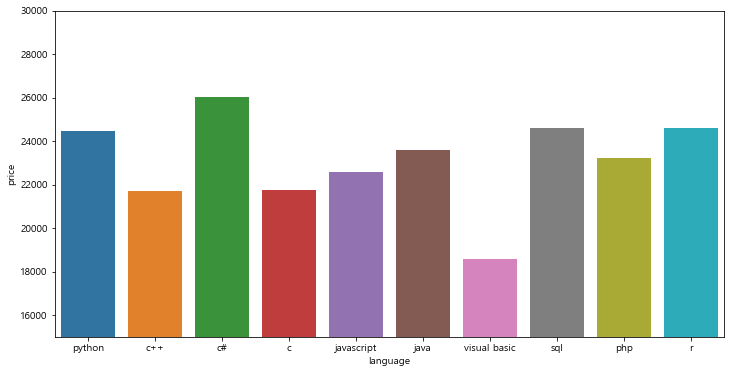

In [420]:
price_profile = []
for i in result_books['language'].unique():
    ask = result_books['publisher'].value_counts().index[idx]
    price_profile.append([i, result_books[result_books['language']==i]['price'].mean()])
price_profile = pd.DataFrame(price_profile,columns=['language', 'price'])
price_profile.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='language' ,y='price',data=price_profile)
plt.ylim([15000, 30000])
plt.show()